In [161]:
import sys 
sys.path.append('..')

import numpy
import matplotlib.pyplot as plts
from linearRegression import *
from Matrix import *
from Vector import *



# Simple Linear Regression
### Patrick Doolittle 
### Machine Learning
### 5/21/2023

This notebook will demonstrate the role of the four fundamental subspaces, and the moore-penrose psuedo inverse in Linear Regression.
Let's enumerate the main ideas of this notebook:
1. The four fundamental subspaces
    - The column space, the set of all possible linear combinations of the columns of a matrix.
    - The Null space, the set of all vectors v such that $Xv=0$.
    - The row space, the set of all possible linear combinations of the rows of a matrix.
    - The left null space, the set of all vectors such that $X^Tv=0$.
2. The Moore-Penrose Pseudo Inverse $(X^T X)^-1 X^T$
    - Generalizes the idea of the inverse to Embeddings, Projection, and Singular Matrices
3. Simple Linear Regression
    - $Xb=y$ where $X$ is the matrix with columns of predictor variables, $b$ is the vector of coefficients, and $y$ is the vector of responses.
    - The least squares solution is $b=(X^T X)^-1 X^T y$, the moore-penrose pseudo inverse of $X$ applied to $y$.
    - The Moore-Penrose Pseudo Inverse can be used to find the best fit hyperplane (line in 2d) for a set of data points.
     

My own custom Python code to calculate matrix and vector operations will be used along with various visualization libraries (matplotlib, manim) to demonstrate these ideas.

In [162]:
'''
In this code block we will generate a data set of 100 points in 2d, following a linear trend with some noise added.
'''
numpy.random.seed(1)
x = [numpy.random.choice(100) for i in range(100)]
x.sort()
print(x)
print(len(x))
y = [i * numpy.random.uniform(0.9,1.1) for i in x ]
print(y)
data = [(x[i],y[i]) for i in range(len(x))]
print(data)

[0, 1, 1, 3, 3, 3, 5, 6, 7, 7, 8, 8, 9, 9, 9, 10, 11, 12, 13, 13, 14, 15, 15, 16, 18, 20, 21, 22, 22, 23, 23, 23, 24, 25, 25, 25, 25, 26, 26, 27, 28, 29, 30, 32, 32, 34, 37, 37, 38, 41, 43, 46, 47, 49, 50, 50, 52, 55, 57, 57, 57, 60, 61, 62, 63, 64, 64, 65, 67, 68, 68, 68, 70, 71, 71, 71, 72, 72, 74, 75, 76, 76, 77, 79, 80, 81, 82, 83, 84, 86, 87, 87, 87, 87, 88, 88, 92, 94, 96, 98]
100
[0.0, 1.0530970208881743, 0.9090691457149307, 2.783979671515029, 3.1754421514776117, 2.717880814909436, 5.383125475819424, 6.048945827521159, 6.927172253988585, 7.548990220802635, 7.804134945841752, 8.061479510847976, 9.274137987714377, 8.750269836380918, 9.127815410133167, 10.275672968119354, 10.177892747098754, 12.456491010612348, 13.384148439410705, 12.620241630875585, 14.73705254760234, 14.569595170674166, 15.758365059526815, 17.22029385482884, 16.24200909725122, 19.992436278512947, 19.20992644788275, 23.26258648766393, 20.081896251288157, 22.33442766711557, 25.032449964265744, 22.44709511913601, 25

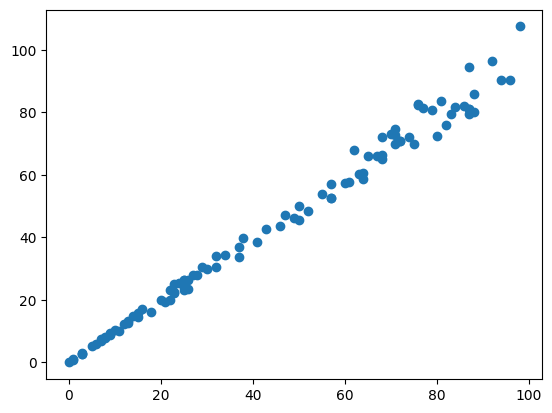

In [163]:
'''Show a scatter plot of the data'''
plt.scatter(x,y)

In [164]:
# Oops! I oversaw that the data would become more variable over time. Let's make the noise fixed with respect to the x-axis.
numpy.random.seed(8)
x = [numpy.random.choice(100) for i in range(100)]
x.sort()
print(x)
print(len(x))
y = [(2*i) + numpy.random.normal(-10,10) + 20 for i in x ]
print(y)
data = [(x[i],y[i]) for i in range(len(x))]
print(data)

[2, 5, 5, 6, 6, 7, 7, 8, 9, 9, 9, 9, 9, 10, 13, 14, 15, 15, 16, 18, 19, 19, 20, 20, 21, 24, 26, 27, 28, 28, 31, 32, 36, 37, 38, 38, 39, 42, 42, 45, 45, 46, 47, 48, 48, 49, 51, 53, 53, 54, 55, 55, 56, 59, 59, 59, 60, 60, 61, 63, 63, 64, 66, 66, 66, 67, 68, 68, 71, 71, 72, 73, 74, 75, 78, 81, 82, 83, 84, 85, 86, 86, 87, 89, 90, 91, 91, 92, 92, 93, 93, 95, 95, 95, 98, 98, 98, 98, 98, 99]
100
[22.760926460222407, 12.92198806528804, 19.698500173028027, 38.80379241055715, 24.659592707663, 20.400963434354153, 16.366427847046147, 14.882533338620881, 27.4845936646979, 35.70240444586712, 41.46613685953287, 26.63507945651034, 34.48059273098347, 16.578897281381746, 59.944227135539315, 44.36370032246026, 35.31811627763455, 23.729289046769882, 16.75797746805192, 47.75604498812924, 52.296342392950464, 45.832848853566475, 36.45510538335497, 45.88010327305681, 50.55227985891608, 65.4219840790328, 59.69156100370813, 68.79232460027839, 64.5784896741054, 69.93431537462199, 79.64089697867422, 71.8909159492